In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power
from numpy import median

In [3]:
'''QUESTION 1'''

'QUESTION 1'

In [4]:
cus = pd.read_csv('Wholesale Customer.csv')

In [5]:
# 1.1. Use methods of descriptive statistics to summarize data.
cus.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [10]:
cus.shape

(440, 9)

In [11]:
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer/Spender       440 non-null int64
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(7), object(2)
memory usage: 31.0+ KB


In [19]:
cus.isnull().values.any()

False

In [20]:
cus.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E1112687B8>,
      dtype=object)

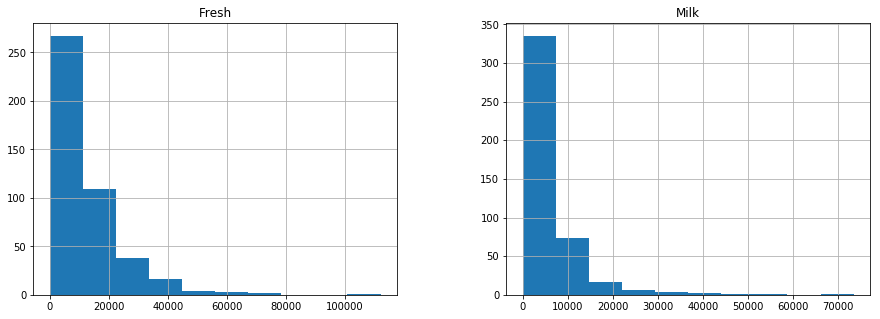

In [339]:
cus[['Fresh','Milk']].hist(figsize=(15,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E115CBA470>,
      dtype=object)

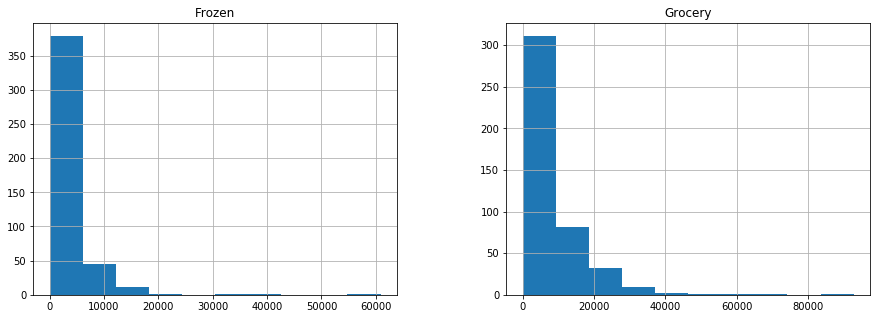

In [340]:
cus[['Grocery','Frozen']].hist(figsize=(15,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E115CCB6D8>,
      dtype=object)

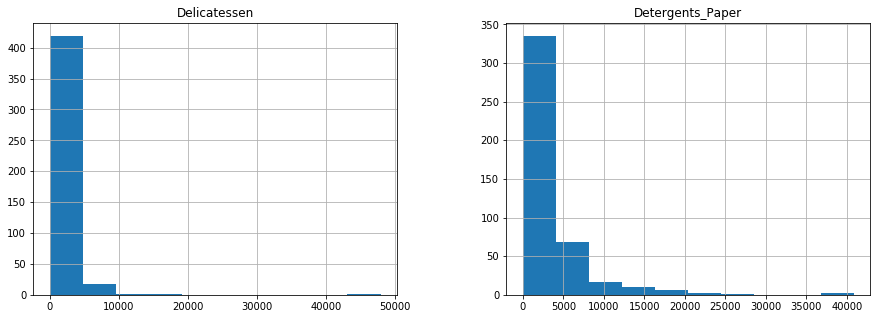

In [341]:
cus[['Detergents_Paper','Delicatessen']].hist(figsize=(15,5))

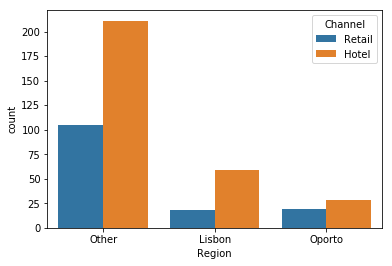

In [354]:
sns.countplot(x="Region", hue="Channel", data=cus)

In [21]:
cus['Total'] = cus['Fresh'] + cus['Milk'] + cus['Grocery'] + cus['Frozen'] + cus['Detergents_Paper'] + cus['Delicatessen']

In [346]:
cus.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


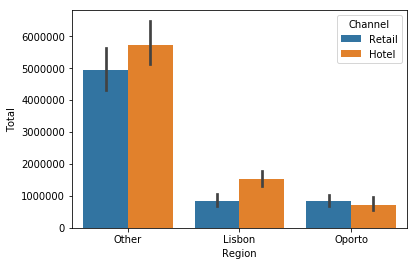

In [411]:
sns.barplot(x="Region", y = 'Total', hue="Channel", data=cus, estimator=sum)

In [348]:
df1 = cus.groupby(['Region', 'Channel'])['Total'].sum()
df1
# df2 = cus.groupby(['Region'])['Total'].sum()
# df2 = cus.groupby(['Channel'])['Total'].sum()
# df2

Region  Channel
Lisbon  Hotel      1538342
        Retail      848471
Oporto  Hotel       719150
        Retail      835938
Other   Hotel      5742077
        Retail     4935522
Name: Total, dtype: int64

In [349]:
# Which Region and which Channel seems to spend more?
df1.loc[df1 == max(df1)]

Region  Channel
Other   Hotel      5742077
Name: Total, dtype: int64

In [128]:
# Which Region and which Channel seems to spend less?
df1.loc[df1 == min(df1)]

Region  Channel
Oporto  Hotel      719150
Name: Total, dtype: int64

In [324]:
# 1.2. There are 6 different varieties of items are considered.
# Do all varieties show similar behaviour across Region and Channel?
df2 = cus.groupby(['Region', 'Channel'])[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']]
df2
# df2.describe().transpose()

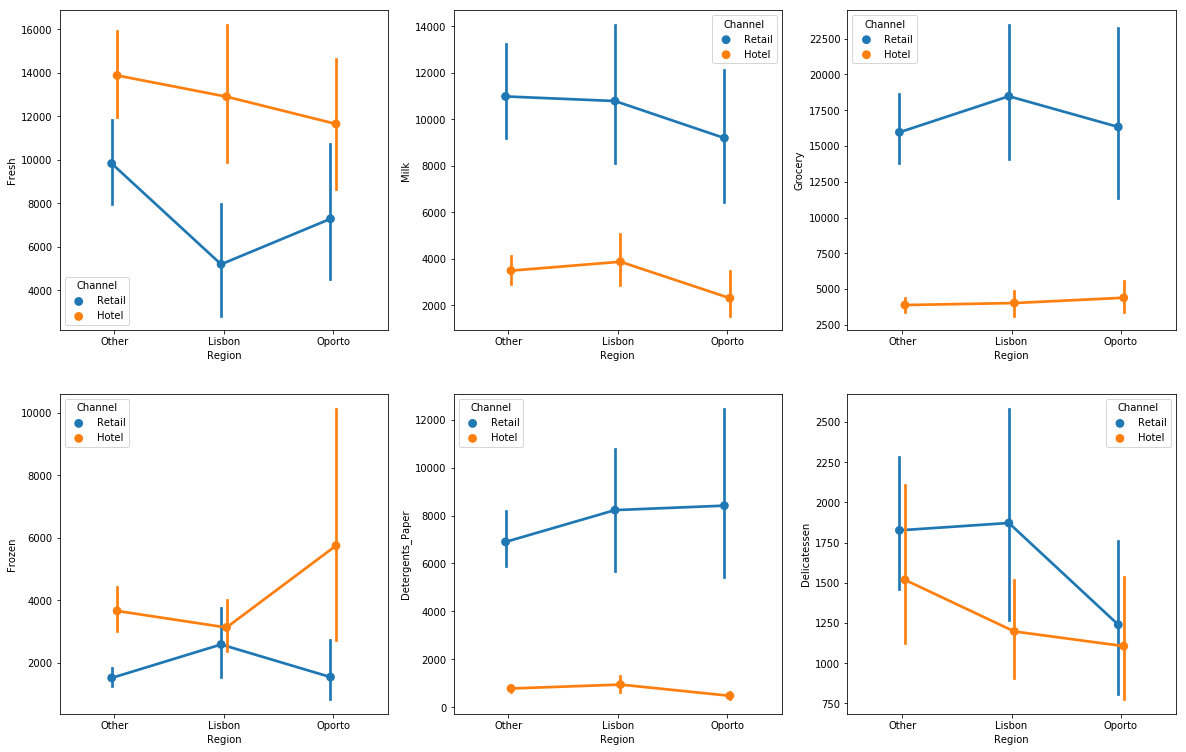

In [414]:
plt.figure(figsize= (20,20))
plt.subplot(3,3,1)
sns.pointplot('Region','Fresh', hue= 'Channel', data = cus, dodge=True)

plt.subplot(3,3,2)
sns.pointplot('Region','Milk', hue= 'Channel', data = cus, dodge=True)

plt.subplot(3,3,3)
sns.pointplot('Region','Grocery', hue= 'Channel', data = cus, dodge=True)

plt.subplot(3,3,4)
sns.pointplot('Region','Frozen', hue= 'Channel', data = cus, dodge=True)

plt.subplot(3,3,5)
sns.pointplot('Region','Detergents_Paper', hue= 'Channel', data = cus, dodge=True)

plt.subplot(3,3,6)
sns.pointplot('Region','Delicatessen', hue= 'Channel', data = cus, dodge=True)

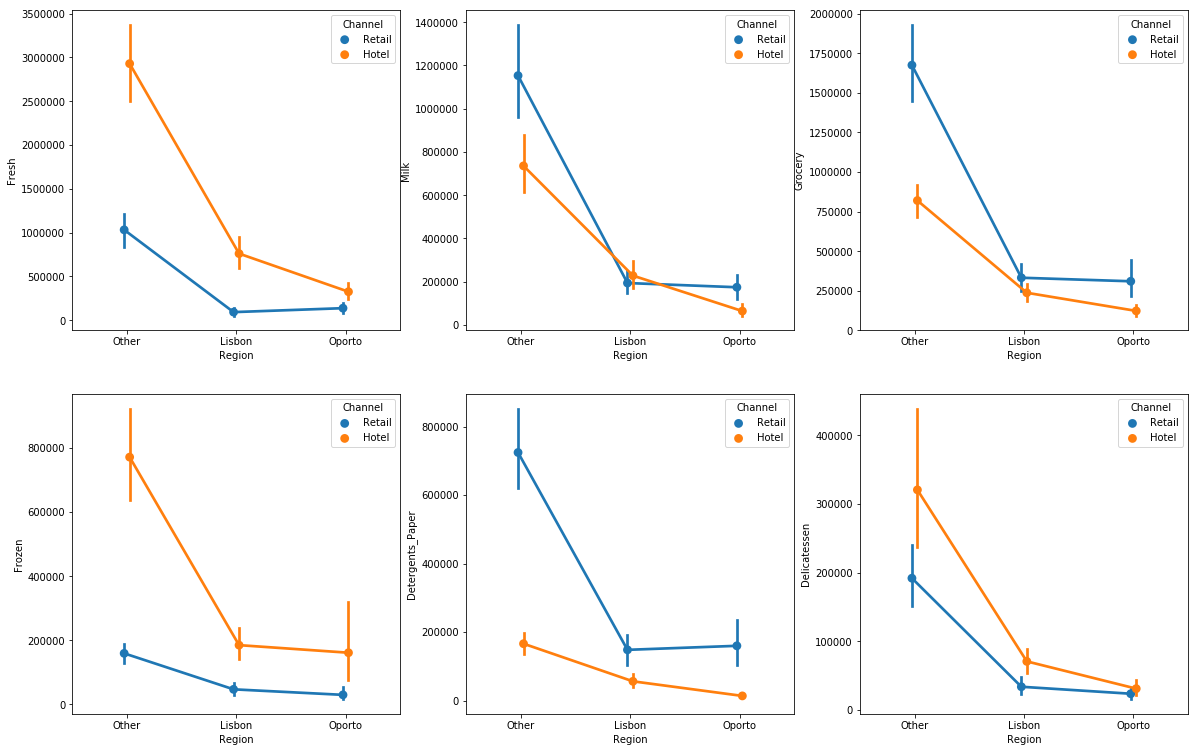

In [416]:
plt.figure(figsize= (20,20))
plt.subplot(3,3,1)
sns.pointplot('Region','Fresh', hue= 'Channel', data = cus, dodge=True, estimator = sum)

plt.subplot(3,3,2)
sns.pointplot('Region','Milk', hue= 'Channel', data = cus, dodge=True, estimator = sum)

plt.subplot(3,3,3)
sns.pointplot('Region','Grocery', hue= 'Channel', data = cus, dodge=True, estimator = sum)

plt.subplot(3,3,4)
sns.pointplot('Region','Frozen', hue= 'Channel', data = cus, dodge=True, estimator = sum)

plt.subplot(3,3,5)
sns.pointplot('Region','Detergents_Paper', hue= 'Channel', data = cus, dodge=True, estimator = sum)

plt.subplot(3,3,6)
sns.pointplot('Region','Delicatessen', hue= 'Channel', data = cus, dodge=True, estimator = sum)

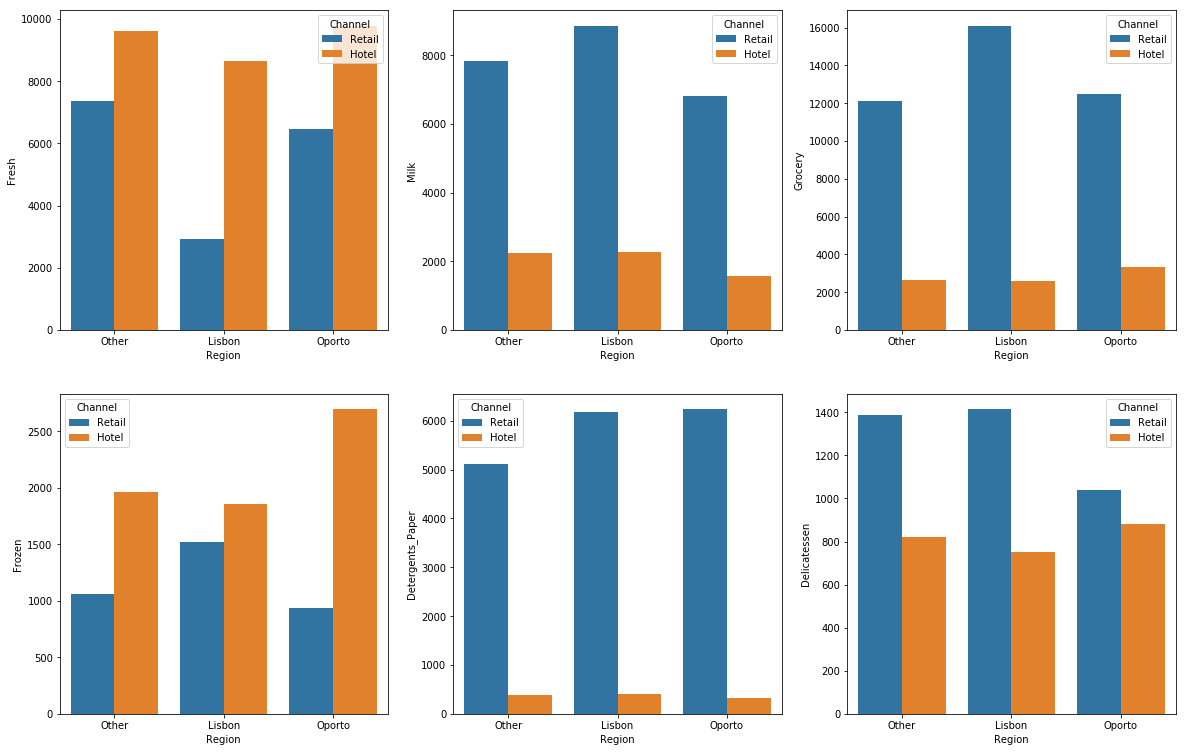

In [396]:
plt.figure(figsize= (20,20))
plt.subplot(3,3,1)
sns.barplot(x = 'Region', y= 'Fresh',hue ='Channel', data = cus, estimator = median, ci = None)

plt.subplot(3,3,2)
sns.barplot(x = 'Region', y= 'Milk',hue ='Channel', data = cus, estimator = median, ci = None)

plt.subplot(3,3,3)
sns.barplot(x = 'Region', y= 'Grocery',hue ='Channel', data = cus, estimator = median, ci = None)

plt.subplot(3,3,4)
sns.barplot(x = 'Region', y= 'Frozen',hue ='Channel', data = cus, estimator = median, ci = None)

plt.subplot(3,3,5)
sns.barplot(x = 'Region', y= 'Detergents_Paper',hue ='Channel', data = cus, estimator = median, ci = None)

plt.subplot(3,3,6)
sns.barplot(x = 'Region', y= 'Delicatessen',hue ='Channel', data = cus, estimator = median, ci = None)

In [423]:
# 1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?
# Which items shows the least inconsistent behaviour?
df = cus[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].describe().transpose() 
df
df.sort_values(by = 'mean',ascending = False)

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [424]:
df['cov'] = df['std']/df['mean']
df['IQR'] = df['75%'] - df['25%']
df['Range'] = df['max'] - df['min']
df
df.sort_values(by = 'cov', ascending = True)

,count,mean,std,min,25%,50%,75%,max,cov,IQR,Range
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,1.053918,13806.00,112148.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,1.195174,8502.75,92777.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,1.273299,5657.25,73443.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,1.580332,2812.00,60844.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,1.654647,3665.25,40824.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,1.849407,1412.00,47940.0


In [376]:
cus['Milk'].std()

7380.377174570843

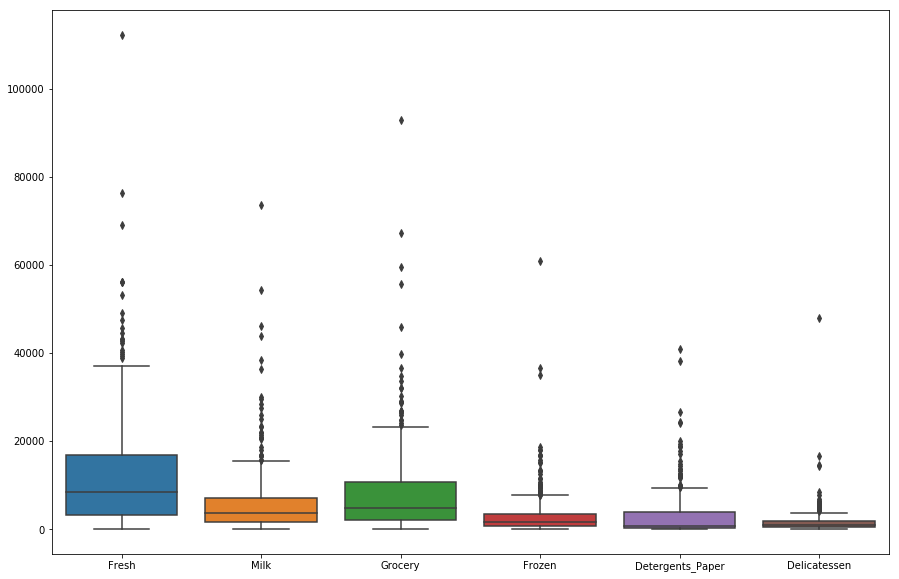

In [425]:
# 1.4. Are there any outliers in the data?
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = cus[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']], ax=ax)

In [130]:
# 1.5. On the basis of this report, what are the recommendations?

In [131]:
'''QUESTION 2'''

'QUESTION 2'

In [6]:
sur = pd.read_csv('Survey.csv')

In [7]:
sur.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [297]:
sur.isnull().values.any()

False

In [149]:
# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)
# 2.1.1. Gender and Major
table1 = pd.crosstab(sur.Gender, sur.Major, margins = True) 
table1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [148]:
# 2.1.2. Gender and Grad Intention
table2 = pd.crosstab(sur.Gender, sur['Grad Intention'], margins = True) 
table2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [150]:
# 2.1.3. Gender and Employment
table3 = pd.crosstab(sur.Gender, sur['Employment'], margins = True) 
table3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [151]:
# 2.1.4. Gender and Computer
table4 = pd.crosstab(sur.Gender, sur['Computer'], margins = True) 
table4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [399]:
# 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

# 2.2.1. What is the probability that a randomly selected CMSU student will be male?
# What is the probability that a randomly selected CMSU student will be female?

Total = 62
Total_Female = 33
Total_Male = 29
Prob_female = Total_Female/Total
print('Female probability:', Prob_female)
Prob_male = Total_Male/Total
print('Male probability:', Prob_male)
#sur['Gender'].value_counts()

Female probability: 0.532258064516129
Male probability: 0.46774193548387094


In [153]:
sur.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,62.0,31.500000,18.041619,1.0,16.25,31.50,46.75,62.0
Age,62.0,21.129032,1.431311,18.0,20.00,21.00,22.00,26.0
GPA,62.0,3.129032,0.377388,2.3,2.90,3.15,3.40,3.9
Salary,62.0,48.548387,12.080912,25.0,40.00,50.00,55.00,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.00,1.00,2.00,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.00,4.00,4.00,6.0
Spending,62.0,482.016129,221.953805,100.0,312.50,500.00,600.00,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.00,200.00,300.00,900.0


In [157]:
# 2.2.2. Find the conditional probability of different majors among the male students in CMSU.
table1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [191]:
# Probability of having accounting as major given the student is male = P(Accounting/Male) = P(Accounting and Male)/P(Male)
#from the above contingency table
P_Accounting_and_male = 4/62
P_male = 29/62
P_Accounting_given_male = P_Accounting_and_male / P_male
#similarly doing for other majors
P_CIS_and_male = 1/62
P_Economics_Finance_and_male = 4/62
P_InternationalBusiness_and_male = 2/62
P_Management_and_male = 6/62
P_Other_and_male = 4/62
P_Retailing_Marketing_and_male = 5/62
P_Undecided_and_male = 3/62
print('Probability of having Accounting as major given the student is male: %1.4f' %(P_Accounting_and_male / P_male))
print('Probability of having CIS as major given the student is male: %1.4f' %(P_CIS_and_male / P_male))
print('Probability of having Economics/Finance as major given the student is male: %1.4f' %(P_Economics_Finance_and_male / P_male))
print('Probability of having International Business as major given the student is male: %1.4f' %(P_InternationalBusiness_and_male / P_male))
print('Probability of having Management as major given the student is male: %1.4f' %(P_Management_and_male / P_male))
print('Probability of having Other as major given the student is male: %1.4f' %(P_Other_and_male / P_male))
print('Probability of having Retailing/Marketing as major given the student is male: %1.4f' %(P_Retailing_Marketing_and_male / P_male))
print('Probability of having Undecided as major given the student is male: %1.4f' %(P_Undecided_and_male / P_male))

Probability of having Accounting as major given the student is male: 0.1379
Probability of having CIS as major given the student is male: 0.0345
Probability of having Economics/Finance as major given the student is male: 0.1379
Probability of having International Business as major given the student is male: 0.0690
Probability of having Management as major given the student is male: 0.2069
Probability of having Other as major given the student is male: 0.1379
Probability of having Retailing/Marketing as major given the student is male: 0.1724
Probability of having Undecided as major given the student is male: 0.1034


In [11]:
x = sur.groupby("Gender").size().div(len(sur))
x

Gender
Female    0.532258
Male      0.467742
dtype: float64

In [12]:
y = sur.groupby(["Gender", 'Major']).size().div(len(sur)).div(x)
y

Gender  Major                 
Female  Accounting                0.090909
        CIS                       0.090909
        Economics/Finance         0.212121
        International Business    0.121212
        Management                0.121212
        Other                     0.090909
        Retailing/Marketing       0.272727
Male    Accounting                0.137931
        CIS                       0.034483
        Economics/Finance         0.137931
        International Business    0.068966
        Management                0.206897
        Other                     0.137931
        Retailing/Marketing       0.172414
        Undecided                 0.103448
dtype: float64

In [202]:
# Find the conditional probability of different majors among the female students of CMSU.

# Probability of having accounting as major given the student is female = P(Accounting/Female) = P(Accounting and Female)/P(Female)
#from the above contingency table
P_Accounting_and_female = 3/62
P_female = 33/62
P_Accounting_given_female = P_Accounting_and_female / P_female
#similarly doing for other majors
P_CIS_and_female = 3/62
P_Economics_Finance_and_female = 7/62
P_InternationalBusiness_and_female = 4/62
P_Management_and_female = 4/62
P_Other_and_female = 3/62
P_Retailing_Marketing_and_female = 9/62
P_Undecided_and_female = 0/62
print('Probability of having Accounting as major given the student is female: %1.4f' %(P_Accounting_and_female / P_female))
print('Probability of having CIS as major given the student is female: %1.4f' %(P_CIS_and_female / P_female))
print('Probability of having Economics/Finance as major given the student is female: %1.4f' %(P_Economics_Finance_and_female / P_female))
print('Probability of having International Business as major given the student is female: %1.4f' %(P_InternationalBusiness_and_female / P_female))
print('Probability of having Management as major given the student is female: %1.4f' %(P_Management_and_female / P_female))
print('Probability of having Other as major given the student is female: %1.4f' %(P_Other_and_female / P_female))
print('Probability of having Retailing/Marketing as major given the student is female: %1.4f' %(P_Retailing_Marketing_and_female / P_female))
print('Probability of having Undecided as major given the student is female: %1.4f' %(P_Undecided_and_female / P_female))

Probability of having Accounting as major given the student is female: 0.0909
Probability of having CIS as major given the student is female: 0.0909
Probability of having Economics/Finance as major given the student is female: 0.2121
Probability of having International Business as major given the student is female: 0.1212
Probability of having Management as major given the student is female: 0.1212
Probability of having Other as major given the student is female: 0.0909
Probability of having Retailing/Marketing as major given the student is female: 0.2727
Probability of having Undecided as major given the student is female: 0.0000


In [192]:
# 2.2.3. Find the conditional probability of intent to graduate, given that the student is a male.
table2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [187]:
#Probability of having intent as No given the student is male = P(No/male) = P(No and male)/P(male)
P_No_and_male = 3/62
P_male = 29/62
P_No_given_male = P_No_and_male / P_male
#similarly doing for other intents
P_Undecided_and_male = 9/62
P_Yes_and_male = 17/62
print('Probability of having intent as No given the student is male: %1.4f' %(P_No_and_male / P_male))
print('Probability of having intent as Undecided given the student is male: %1.4f' %(P_Undecided_and_male / P_male))
print('Probability of having intent as Yes given the student is male: %1.4f' %(P_Yes_and_male / P_male))

Probability of having intent as No given the student is male: 0.1034
Probability of having intent as Undecided given the student is male: 0.3103
Probability of having intent as Yes given the student is male: 0.5862


In [193]:
# Find the conditional probability of intent to graduate, given that the student is a female.

#Probability of having intent as No given the student is female = P(No/female) = P(No and female)/P(female)
P_No_and_female = 9/62
P_female = 33/62
P_No_given_female = P_No_and_female / P_female
#similarly doing for other intents
P_Undecided_and_female = 13/62
P_Yes_and_female = 11/62
print('Probability of having intent as No given the student is female: %1.4f' %(P_No_and_female / P_female))
print('Probability of having intent as Undecided given the student is female: %1.4f' %(P_Undecided_and_female / P_female))
print('Probability of having intent as Yes given the student is female: %1.4f' %(P_Yes_and_female / P_female))

Probability of having intent as No given the student is female: 0.2727
Probability of having intent as Undecided given the student is female: 0.3939
Probability of having intent as Yes given the student is female: 0.3333


In [194]:
# 2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.
table3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [197]:
#Probability of having employment status as Full-Time given the student is male = P(Full-Time/male) = P(Full-Time and male)/P(male)
P_FullTime_and_male = 7/62
P_male = 29/62
P_FullTime_given_male = P_FullTime_and_male / P_male
#similarly doing for other employment status
P_PartTime_and_male = 19/62
P_Unemployed_and_male = 3/62
print('Probability of having employment status as Full-Time given the student is male: %1.4f' %(P_FullTime_and_male / P_male))
print('Probability of having employment status as Part-Time given the student is male: %1.4f' %(P_PartTime_and_male / P_male))
print('Probability of having employment status as Unemployed given the student is male: %1.4f' %(P_Unemployed_and_male / P_male))

Probability of having employment status as Full-Time given the student is male: 0.2414
Probability of having employment status as Part-Time given the student is male: 0.6552
Probability of having employment status as Unemployed given the student is male: 0.1034


In [198]:
#Probability of having employment status as Full-Time given the student is female = P(Full-Time/female) = P(Full-Time and female)/P(female)
P_FullTime_and_female = 3/62
P_female = 33/62
P_FullTime_given_female = P_FullTime_and_female / P_female
#similarly doing for other employment status
P_PartTime_and_female = 24/62
P_Unemployed_and_female = 6/62
print('Probability of having employment status as Full-Time given the student is female: %1.4f' %(P_FullTime_and_female / P_female))
print('Probability of having employment status as Part-Time given the student is female: %1.4f' %(P_PartTime_and_female / P_female))
print('Probability of having employment status as Unemployed given the student is female: %1.4f' %(P_Unemployed_and_female / P_female))

Probability of having employment status as Full-Time given the student is female: 0.0909
Probability of having employment status as Part-Time given the student is female: 0.7273
Probability of having employment status as Unemployed given the student is female: 0.1818


In [199]:
# 2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.
table4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [201]:
#Probability of having Desktop as preference given the student is male = P(Desktop/male) = P(Desktop and male)/P(male)
P_Desktop_and_male = 3/62
P_male = 29/62
P_Desktop_given_male = P_Desktop_and_male / P_male
#similarly doing for other preferences
P_Laptop_and_male = 26/62
P_Tablet_and_male = 0/62
print('Probability of having Desktop as preference given the student is male: %1.4f' %(P_Desktop_and_male / P_male))
print('Probability of having Laptop as preference given the student is male: %1.4f' %(P_Laptop_and_male / P_male))
print('Probability of having Tablet as preference given the student is male: %1.4f' %(P_Tablet_and_male / P_male))

Probability of having Desktop as preference given the student is male: 0.1034
Probability of having Laptop as preference given the student is male: 0.8966
Probability of having Tablet as preference given the student is male: 0.0000


In [203]:
#Probability of having Desktop as preference given the student is female = P(Desktop/female) = P(Desktop and female)/P(female)
P_Desktop_and_female = 2/62
P_female = 33/62
P_Desktop_given_female = P_Desktop_and_female / P_female
#similarly doing for other preferences
P_Laptop_and_female = 29/62
P_Tablet_and_female = 2/62
print('Probability of having Desktop as preference given the student is female: %1.4f' %(P_Desktop_and_female / P_female))
print('Probability of having Laptop as preference given the student is female: %1.4f' %(P_Laptop_and_female / P_female))
print('Probability of having Tablet as preference given the student is female: %1.4f' %(P_Tablet_and_female / P_female))

Probability of having Desktop as preference given the student is female: 0.0606
Probability of having Laptop as preference given the student is female: 0.8788
Probability of having Tablet as preference given the student is female: 0.0606


In [214]:
# 2.3. Based on the above probabilities, do you think that the column variable in each case is independent of Gender?
# Justify your comment in each case.
# 1.for Gender and Major
table1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [269]:
print('For Accounting:')
print('P(Accounting/male) : P(Accounting/female) : P(Accounting) = %1.4f' %(P_Accounting_and_male / P_male), ': %1.4f' %(P_Accounting_and_female / P_female), ': %1.4f' %(7/62))
print('For CIS:')
print('P(CIS/male) : P(CIS/female) : P(CIS) = %1.4f' %(P_CIS_and_male / P_male), ': %1.4f' %(P_CIS_and_female / P_female), ': %1.4f' %(4/62))
print('For Economics/Finance:')
print('P(EconomicsORFinance/male) : P(EconomicsORFinance/female) : P(EconomicsORFinance) = %1.4f' %(P_Economics_Finance_and_male / P_male), ': %1.4f' %(P_Economics_Finance_and_female / P_female), ': %1.4f' %(11/62))
print('For International Business:')
print('P(InternationalBusiness/male) : P(InternationalBusiness/female) : P(InternationalBusiness) = %1.4f' %(P_InternationalBusiness_and_male / P_male), ': %1.4f' %(P_InternationalBusiness_and_female / P_female), ': %1.4f' %(6/62))
print('For Management:')
print('P(Management/male) : P(Management/female) : P(Management) = %1.4f' %(P_Management_and_male / P_male), ': %1.4f' %(P_Management_and_female / P_female), ': %1.4f' %(10/62))
print('For Other:')
print('P(Other/male) : P(Other/female) : P(Other) = %1.4f' %(P_Other_and_male / P_male), ': %1.4f' %(P_Other_and_female / P_female), ': %1.4f' %(7/62))
print('For Retailing/Marketing:')
print('P(RetailingORMarketing/male) : P(RetailingORMarketing/female) : P(RetailingORMarketing) = %1.4f' %(P_Retailing_Marketing_and_male / P_male), ': %1.4f' %(P_Retailing_Marketing_and_female / P_female), ': %1.4f' %(14/62))
print('For Undecided:')
print('P(Undecided/male) : P(Undecided/female) : P(Undecided) = %1.4f' %(P_Undecided_and_male / P_male), ': %1.4f' %(P_Undecided_and_female / P_female), ': %1.4f' %(3/62))

print('Probability of having Accounting as major given the student is male: %1.4f' %(P_Accounting_and_male / P_male))

For Accounting:
P(Accounting/male) : P(Accounting/female) : P(Accounting) = 0.1379 : 0.0909 : 0.1129
For CIS:
P(CIS/male) : P(CIS/female) : P(CIS) = 0.0345 : 0.0909 : 0.0645
For Economics/Finance:
P(EconomicsORFinance/male) : P(EconomicsORFinance/female) : P(EconomicsORFinance) = 0.1379 : 0.2121 : 0.1774
For International Business:
P(InternationalBusiness/male) : P(InternationalBusiness/female) : P(InternationalBusiness) = 0.0690 : 0.1212 : 0.0968
For Management:
P(Management/male) : P(Management/female) : P(Management) = 0.2069 : 0.1212 : 0.1613
For Other:
P(Other/male) : P(Other/female) : P(Other) = 0.1379 : 0.0909 : 0.1129
For Retailing/Marketing:
P(RetailingORMarketing/male) : P(RetailingORMarketing/female) : P(RetailingORMarketing) = 0.1724 : 0.2727 : 0.2258
For Undecided:
P(Undecided/male) : P(Undecided/female) : P(Undecided) = 0.1034 : 0.0000 : 0.0484
Probability of having Accounting as major given the student is male: 0.1379


In [270]:
# 2.for Gender and Grad Intention
table2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [279]:
print('for No')
print('P(No/male) : P(No/female) : P(No) = %1.4f' %(P_No_and_male / P_male), ': %1.4f' %(P_No_and_female / P_female), ': %1.4f' %(12/62))
print('for Undecided')
print('P(Undecided/male) : P(Undecided/female) : P(Undecided) = %1.4f' %(P_Undecided_and_male / P_male), ': %1.4f' %(P_Undecided_and_female / P_female), ': %1.4f' %(22/62))
print('for Yes')
print('P(Yes/male) : P(Yes/female) : P(Yes) = %1.4f' %(P_Yes_and_male / P_male), ': %1.4f' %(P_Yes_and_female / P_female), ': %1.4f' %(28/62))

for No
P(No/male) : P(No/female) : P(No) = 0.1034 : 0.2727 : 0.1935
for Undecided
P(Undecided/male) : P(Undecided/female) : P(Undecided) = 0.1034 : 0.0000 : 0.3548
for Yes
P(Yes/male) : P(Yes/female) : P(Yes) = 0.5862 : 0.3333 : 0.4516


In [280]:
# 3.for Gender and Employment status
table3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [281]:
print('for Full-Time')
print('P(Full-Time/male) : P(Full-Time/female) : P(Full-Time) = %1.4f' %(P_FullTime_and_male / P_male), ': %1.4f' %(P_FullTime_and_female / P_female), ': %1.4f' %(10/62))
print('for Part-Time')
print('P(Part-Time/male) : P(Part-Time/female) : P(Part-Time) = %1.4f' %(P_PartTime_and_male / P_male), ': %1.4f' %(P_PartTime_and_female / P_female), ': %1.4f' %(43/62))
print('for Unemployed')
print('P(Unemployed/male) : P(Unemployed/female) : P(Unemployed) = %1.4f' %(P_Unemployed_and_male / P_male), ': %1.4f' %(P_Unemployed_and_female / P_female), ': %1.4f' %(9/62))

for Full-Time
P(Full-Time/male) : P(Full-Time/female) : P(Full-Time) = 0.2414 : 0.0909 : 0.1613
for Part-Time
P(Part-Time/male) : P(Part-Time/female) : P(Part-Time) = 0.6552 : 0.7273 : 0.6935
for Unemployed
P(Unemployed/male) : P(Unemployed/female) : P(Unemployed) = 0.1034 : 0.1818 : 0.1452


In [282]:
# 4.for Gender and Computer
table4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [283]:
print('for Desktop')
print('P(Desktop/male) : P(Desktop/female) : P(Desktop) = %1.4f' %(P_Desktop_and_male / P_male), ': %1.4f' %(P_Desktop_and_female / P_female), ': %1.4f' %(5/62))
print('for Laptop')
print('P(Laptop/male) : P(Laptop/female) : P(Laptop) = %1.4f' %(P_Laptop_and_male / P_male), ': %1.4f' %(P_Laptop_and_female / P_female), ': %1.4f' %(55/62))
print('for Tablet')
print('P(Tablet/male) : P(Tablet/female) : P(Tablet) = %1.4f' %(P_Tablet_and_male / P_male), ': %1.4f' %(P_Tablet_and_female / P_female), ': %1.4f' %(2/62))

for Desktop
P(Desktop/male) : P(Desktop/female) : P(Desktop) = 0.1034 : 0.0606 : 0.0806
for Laptop
P(Laptop/male) : P(Laptop/female) : P(Laptop) = 0.8966 : 0.8788 : 0.8871
for Tablet
P(Tablet/male) : P(Tablet/female) : P(Tablet) = 0.0000 : 0.0606 : 0.0323


In [284]:
# if P(Male) = P(Something/male) then they are independent
# If these values are way different then they are not independent
# We often assume that events are independent and test that assumption on sample data. 
# If the probabilities are significantly different, then we conclude the events are not independent. 
# Two events, A and B, are independent if P(A/B) = P(A) and P(B/A) = P(B)
# Events A and B are independent if the equation P(A∩B) = P(A) · P(B)

In [401]:
# Part II

# 2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.
# Write a note summarizing your conclusions.
# [Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]


In [403]:
sur[['Salary','Spending','Text Messages']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Salary,62.0,48.548387,12.080912,25.0,40.0,50.0,55.0,80.0
Spending,62.0,482.016129,221.953805,100.0,312.5,500.0,600.0,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.0,200.0,300.0,900.0


In [409]:
#Performing the Shapiro-Wilk test for normality. consider alpha = 0.05
print('Salary',shapiro(sur['Salary']))
print('Spending',shapiro(sur['Spending']))
print('Text Messages',shapiro(sur['Text Messages']))

Salary (0.9565856456756592, 0.028000956401228905)
Spending (0.8777452111244202, 1.6854661225806922e-05)
Text Messages (0.8594191074371338, 4.324040673964191e-06)


C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


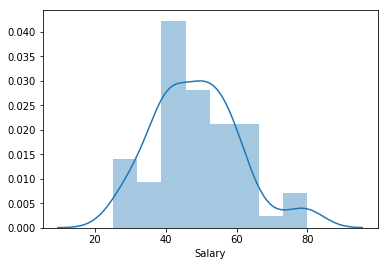

In [402]:
sns.distplot(sur['Salary'])

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


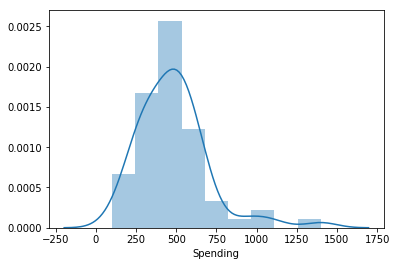

In [291]:
sns.distplot(sur['Spending'])

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


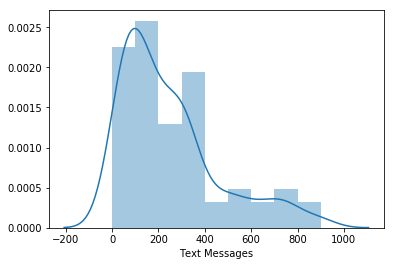

In [292]:
sns.distplot(sur['Text Messages'])

In [ ]:
'''QUESTION 3'''

In [293]:
ab = pd.read_csv('A & B shingles.csv')

In [295]:
ab.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [299]:
ab.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [ ]:
# 3.1. For the A shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.
# Ho: MeanA >= 0.35
# Ha : MeanA < 0.35

In [301]:
# 3.2. For the B shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.
# Ho: MeanB >= 0.35
# Ha : MeanB < 0.35

In [314]:
# 3.3. Do you think that the population means for shingles A and B are equal?
# Form the hypothesis and conduct the test of the hypothesis.
# What assumption do you need to check before the test for equality of means is performed?
#t_statistic, p_value = ttest_ind(ab['A'], ab['B'])
# Ho : Mu1 = Mu2
# Ha : Mu1 != Mu2
# consider alpha as 0.05
group1 = ab['A']

In [318]:
group2 = ab['B'].dropna()

In [321]:
t_statistic, p_value = ttest_ind(group1, group2)
print(t_statistic, p_value)

1.289628271966112 0.2017496571835328


In [323]:
p_value/2

0.1008748285917664

In [322]:
#between A and B there is a difference of about 1.289 SD
# pvalue !< 0.05, so we fail to reject the null hypothesis

In [ ]:
# 3.4. What assumption about the population distribution is needed in order to conduct the hypothesis tests above?
# the population is normally distributed